In [6]:
import matplotlib.pyplot as plt
import numpy as np

## Trend

In [10]:
def trend(time, slope=0):
    '''
    This method generate synthetic data which follows a straight lie given a slope value.
    
    Args:
        time (array of int): contains the time steps
        slope (float): determines the direction and steepness of the line
    Returns:
        series (array of float): measurements that folloes a straight line
    '''
    
    series = slope * time
    
    return series

In [18]:
def plot_series(time, series, start=0, end=None, label=None):
    '''
    This method visualize time series data.
    
    Args:
        time (array of int): contains the time steps
        series (array of int): contains the measurements for each time step
        format (string): line style
        start (int): first time step to plot
        end (int): last time step to plot
        label (list of strings): tag for the line
    '''
    
    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))
    
    # Plot the time series data
    plt.plot(time[start:end], series[start:end])
    
    # Label the x-axis
    plt.xlabel("Time")
    
    # Label the y-axis
    plt.ylabel("Value")
    
    # If adding the label
    if label:
        plt.legend(fontsize=14, labels=label)
        
    # Overlay a grid on the graph
    plt.grid(True)
    
    # Draw the graph
    plt.show()
    

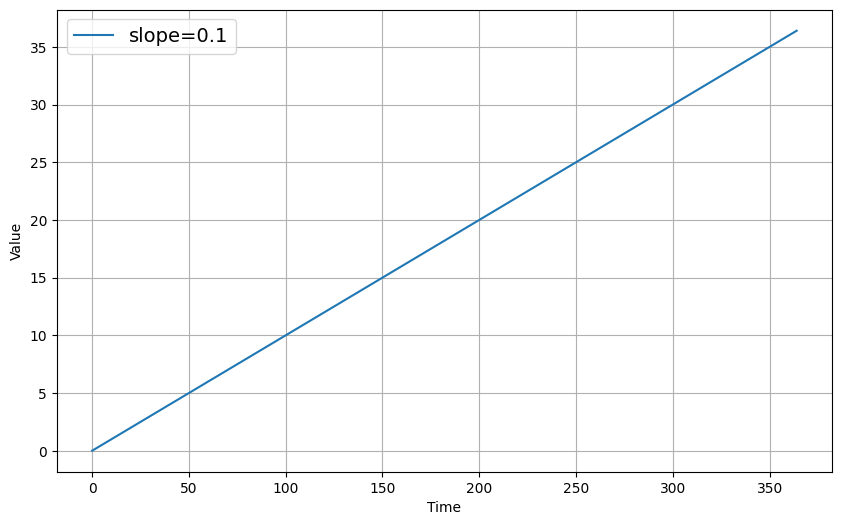

In [19]:
# Generate time steps (365 days):
time = np.arange(365)

# Slope (this variable determines how much the value of the series increases or decreases over time):
slope = 0.1

series = trend(time, slope)

plot_series(time, series, label=[f'slope={slope}'])

## Seasonality

In [ ]:
def seasonal_pattern(season_time):
    '''
    This method return an abitraty pattern (we can chane if we want):
    
    Args:
        season_time (array of float): contains the measurements per time step
    
    Returns:
        data_pattern (array of float): contains revised measurement values according to the defined pattern
    '''
    
    data_pattern = np.where(season_time < 0.4,
                            np.cos(season_time * 2 * np.pi),
                            1 / np.exp(3 * season_time))
    
    return data_pattern

In [26]:
def seasonality(time, period, amplitude=1, phase=0):
    '''
    Args:
        time (array of int): contains the time step
        period (int)L number of time steps before the pattern repeats
        amplitude (int): peak measured value in a period 
        phase (int): number of time steps to shift the measured values
        
    Returns:
        data_pattern (array of float): seasonal data scaled by the defined amplitude
    '''
    
    # Define the measured values per period
    season_time = ((time + phase) % period) / period
    
    # Generates the seasonal data scaled by the defined amplitude
    data_pattern = amplitude * seasonal_pattern(season_time)
    
    return data_pattern

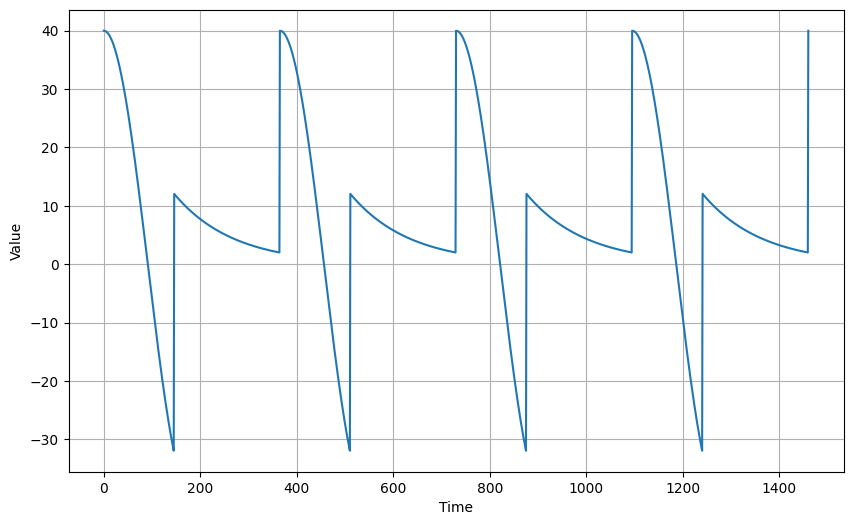

In [27]:
time = np.arange(4 * 365 + 1)

period = 365
amplitude = 40

series = seasonality(time, period=period, amplitude=amplitude)

plot_series(time, series)

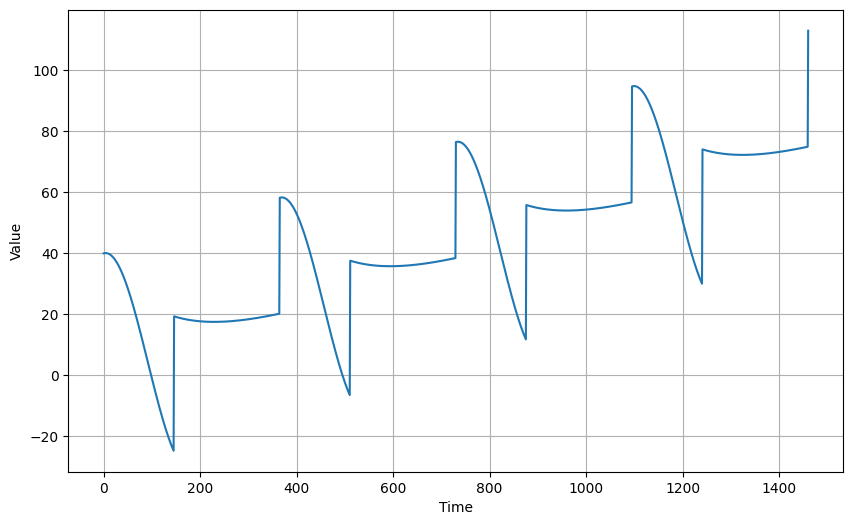

In [28]:
slope = 0.05
period = 365
amplitude == 40

series = trend(time, slope) + seasonality(time, period=period, amplitude=amplitude)

plot_series(time, series)

## Noise

In [34]:
def noise(time, noise_level, seed=None):
    '''
    This method generate a normally distributed noisy signal.
    
    Args:
        time (array of int): time steps
        noise_level: scaling factor for the generated signal
        seed (int)
        
    Returns:
        noise (array of float): the noisy signal
    '''
    
    '''
    The following function generates random numbers from a standard normal distribution.
    The range of these numbers is theoretically from negative infinity to positive infinity, 
    but practically, most of the values will lie within a few standard deviations from the mean (0).
    '''
    rnd = np.random.RandomState(seed)
    
    # Generate a random number for each time step and scale by the noise level
    noise = rnd.randn(len(time)) * noise_level    
    
    return noise

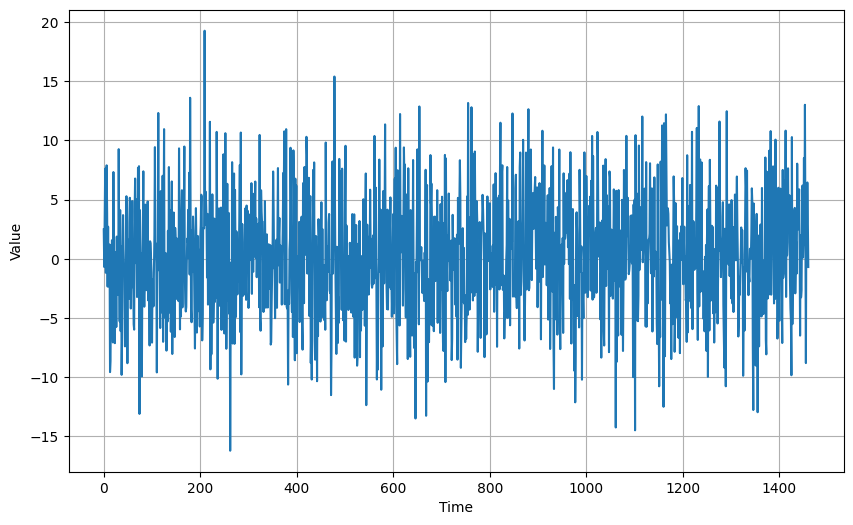

In [35]:
noise_level = 5

noise_signal = noise(time, noise_level=noise_level, seed=42)

plot_series(time, noise_signal)

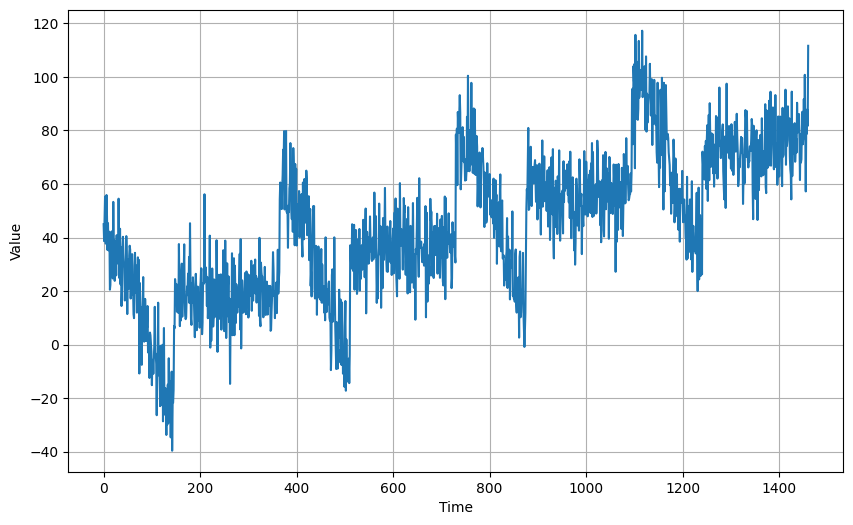

In [36]:
# Add the noise to the time series
series += noise_signal

plot_series(time, series)

## Autocorrelation

In [ ]:
def autocorrelation(time, amplitude, seed=None):
    '''
    This method generates autocorrelated data.
    
    Args:
        time 
        amplitude
        seed
        
    Returns:
        ar
    '''
    
    rnd = np.random.RandomState(seed)
    
    ar = rnd.randn(len(time) + 50) # QUESTION: Why plus 50?
    
    # Set first 50 elements to a constant
    ar[:50] = 100 # QUESTION: Why set these elements to a constant?
    
    # Scaling factor
    phi1 = 0.5
    phi2 = -0.1
    
    for step in range(50, len(time) + 50):
        ar[step] += phi1 * ar[step - 50]
        ar[step] += phi2 * ar[step - 30]
        
    ar = ar[50:] * amplitude # QUESTIN: Why leave the first 50 elements?
    
    return ar
    
    pass

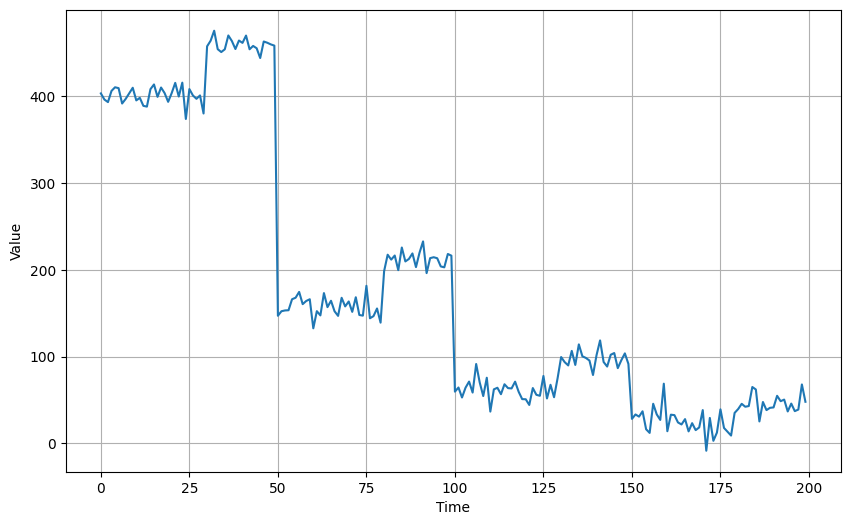

In [43]:
series = autocorrelation(time, amplitude=10, seed=42)

plot_series(time[:200], series[:200])

In [46]:
def autocorrelation(time, amplitude, seed=None):
    '''
    This method generates autocorrelated data.
    
    Args:
        time
        amplitude
        seed

    Returns:
        ar
    '''
    
    rnd = np.random.RandomState(seed)
    
    ar = rnd.randn(len(time) + 1)
    
    # Scaling factor
    phi = 0.8
    
    for step in range(1, len(time) + 1):
        ar[step] += phi * ar[step - 1]
        
    ar = ar[1:] * amplitude # QUESTION: Why leave the first element?
    
    return ar

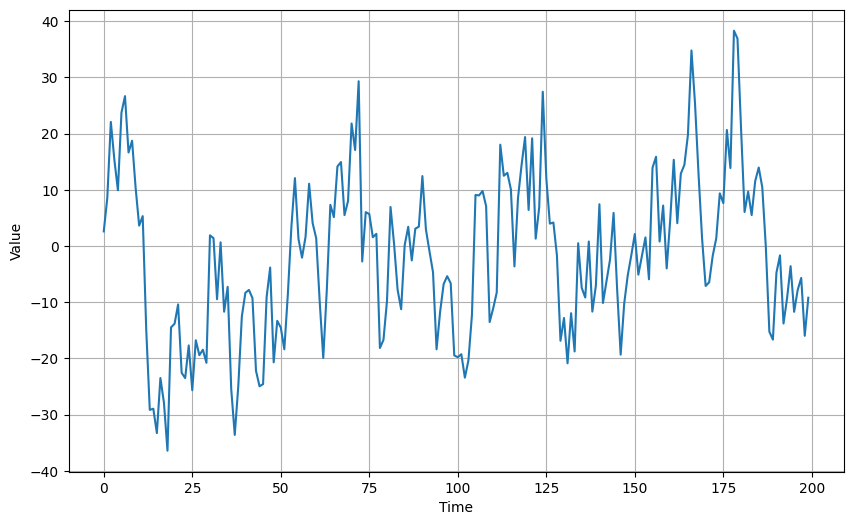

In [47]:
series = autocorrelation(time, amplitude=10, seed=42)

plot_series(time[:200], series[:200])